# **Convolutional Neural Network**
A Convolutional Neural Network (CNN) is a type of Artificial Neural Network used in Image recognition and processing that is specifically designed to process pixel data. ... A neural network is a system of hardware and/or software patterned after the operation of neurons in the human brain.

# **Mount the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Textile_Project/'

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Textile_Project

/content/gdrive/MyDrive/Textile_Project


In [3]:
!ls

'Abstract Template.docx'
 Code
 Model_data
'Problem Statement Template.gslides'
'Project showcase Video.mp4'
'Team_1_AI_Design_Thinking_Activity(Nishita, Pallavi, Somalee, Lakshmi, Pooja).pdf'
 Test_data
 Textile_Defect_Detection.docx
 Textile_Defect_Detection.pptx
 Train_data


### Importing the libraries

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [5]:
print('tf_version:', tf.__version__)

tf_version: 2.8.0


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Textile_Project/Model_data/Train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 180 images belonging to 6 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Textile_Project/Test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 6 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))


In [12]:
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))


cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))

### Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(128, activation ='relu'))


### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Model summary

View all the layers of the network using the model's `Model.summary` method:

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
6/6 [==============================] - 1s 261ms/step - loss: 0.5765 - accuracy: 0.7611 - val_loss: 2.5242 - val_accuracy: 0.4167
Epoch 2/200
6/6 [==============================] - 1s 233ms/step - loss: 0.4824 - accuracy: 0.7833 - val_loss: 2.7450 - val_accuracy: 0.4444
Epoch 3/200
6/6 [==============================] - 1s 231ms/step - loss: 0.5211 - accuracy: 0.8056 - val_loss: 2.7504 - val_accuracy: 0.4306
Epoch 4/200
6/6 [==============================] - 1s 236ms/step - loss: 0.4959 - accuracy: 0.7889 - val_loss: 2.7060 - val_accuracy: 0.4583
Epoch 5/200
6/6 [==============================] - 1s 234ms/step - loss: 0.5072 - accuracy: 0.7944 - val_loss: 2.6632 - val_accuracy: 0.4306
Epoch 6/200
6/6 [==============================] - 1s 238ms/step - loss: 0.5397 - accuracy: 0.7778 - val_loss: 2.7374 - val_accuracy: 0.4861
Epoch 7/200
6/6 [==============================] - 1s 234ms/step - loss: 0.4507 - accuracy: 0.8111 - val_loss: 2.9525 - val_accuracy: 0.4861
Epoch 8/200
6

In [20]:
history.history

{'accuracy': [0.7611111402511597,
  0.7833333611488342,
  0.8055555820465088,
  0.7888888716697693,
  0.7944444417953491,
  0.7777777910232544,
  0.8111110925674438,
  0.7888888716697693,
  0.8055555820465088,
  0.8111110925674438,
  0.7833333611488342,
  0.8055555820465088,
  0.8166666626930237,
  0.7777777910232544,
  0.800000011920929,
  0.7833333611488342,
  0.8055555820465088,
  0.8055555820465088,
  0.800000011920929,
  0.8222222328186035,
  0.8111110925674438,
  0.8222222328186035,
  0.8277778029441833,
  0.8333333134651184,
  0.8222222328186035,
  0.8500000238418579,
  0.8500000238418579,
  0.8333333134651184,
  0.8166666626930237,
  0.8055555820465088,
  0.8166666626930237,
  0.7777777910232544,
  0.8222222328186035,
  0.8166666626930237,
  0.7833333611488342,
  0.7722222208976746,
  0.8111110925674438,
  0.8111110925674438,
  0.8111110925674438,
  0.8388888835906982,
  0.8333333134651184,
  0.8388888835906982,
  0.8388888835906982,
  0.8166666626930237,
  0.8111110925674438,


In [21]:
print(cnn.history.history.keys())

print(cnn.history.history)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [0.5764660835266113, 0.48241010308265686, 0.5210601091384888, 0.4959043264389038, 0.5071502923965454, 0.5397384166717529, 0.4507344663143158, 0.44068434834480286, 0.44500482082366943, 0.44475293159484863, 0.5051594972610474, 0.514150083065033, 0.4464074969291687, 0.5660839676856995, 0.49905285239219666, 0.530927300453186, 0.46525776386260986, 0.43430307507514954, 0.4121541380882263, 0.41515007615089417, 0.4405975639820099, 0.43127986788749695, 0.4349018633365631, 0.42676031589508057, 0.40964585542678833, 0.3764483630657196, 0.35356849431991577, 0.38987499475479126, 0.40414759516716003, 0.3764272928237915, 0.41028887033462524, 0.46230730414390564, 0.4188891053199768, 0.47111964225769043, 0.4984836280345917, 0.5087879300117493, 0.4671100974082947, 0.4432142376899719, 0.43153855204582214, 0.35745468735694885, 0.3921341001987457, 0.38201937079429626, 0.41748350858688354, 0.3900727927684784, 0.42481690645217896, 0.37002292

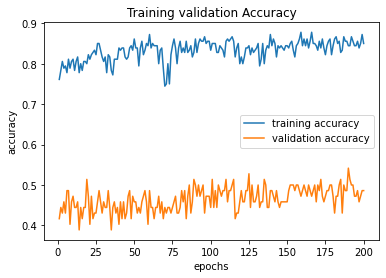

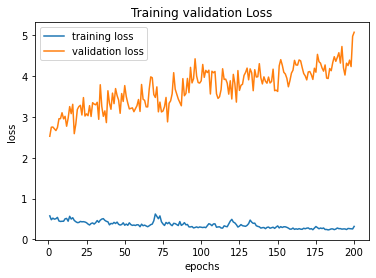

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()

In [23]:
#Evaluate the model

score = cnn.evaluate(test_set, verbose = 1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 106ms/step - loss: 5.0686 - accuracy: 0.4861
Test score: 5.068567276000977
Test accuracy: 0.4861111044883728


In [24]:
cnn.evaluate(test_set)

3/3 [==============================] - 0s 88ms/step - loss: 5.0686 - accuracy: 0.4861


[5.068567752838135, 0.4861111044883728]

#  Prediction on unknown data

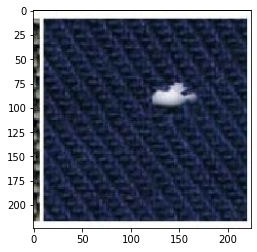

In [25]:
import cv2
img = cv2.imread('/content/gdrive/MyDrive/Textile_Project/Test_data/Hole/img_10.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [26]:
img.shape

(224, 224, 3)

In [27]:
input_img = img.reshape(1,224,224,3)
input_img.shape

(1, 224, 224, 3)

In [37]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/Textile_Project/Test_data/Oil spot/img_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

{'A thick and thin place': 0,
 'Bad selvage': 1,
 'Ball': 2,
 'Broken ends or warp': 3,
 'Hole': 4,
 'Oil spot': 5}

# Making a single prediction

In [38]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/Textile_Project/Test_data/Bad selvage/img_12.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image) 
training_set.class_indices

if result[0][0] == 1:
  prediction = 'Oil spot'
else:
  prediction = 'Bad selvage'



In [39]:
print(prediction)

Bad selvage


# Model Saving Part

In [32]:
cnn.save('/content/gdrive/My Drive/Textile_Project/Model_data/Textile_model.h5')

In [33]:
import keras
new_model = keras.models.load_model('/content/gdrive/My Drive/Textile_Project/Model_data/Textile_model.h5')

In [34]:
new_model.evaluate(test_set)

3/3 [==============================] - 1s 77ms/step - loss: 5.0686 - accuracy: 0.4861


[5.068567276000977, 0.4861111044883728]

In [35]:
cnn.save_weights('/content/gdrive/My Drive/Textile_Project/Model_data/weights.h5')

In [36]:
new_model.load_weights('/content/gdrive/My Drive/Textile_Project/Model_data/weights.h5')